In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\prasenjit patra\\Desktop\\ed video\\playstore-analysis (2) (1).csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.000000,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Tasks
1. Data clean up – Missing value treatment

a. Drop records where rating is missing since rating is our target/study variable

In [7]:
data.dropna(how='any',subset =['Rating'],axis=0 , inplace=True)

In [8]:
data.Rating.isnull().sum()

0

b. Check the null values for the Android Ver column

i. Are all 3 records having the same problem?

In [9]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Yes all 3 record having same problame all are nan

ii.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [10]:
data.drop([10472],inplace = True)

In [11]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


iii. Replace remaining missing values with the mode

In [12]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace=True)

c. Current ver – replace with most common value¶

In [13]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)

# Task: 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

b. Price variable – remove $ sign and convert to float

In [14]:
price = []
for i in data['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [15]:
data.drop(labels=data[data['Price']=='Everyone'].index, inplace = True)
data['Price']= price
data['Price']= data['Price'].astype('float')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.3+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [17]:
install = []
for j in data['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

In [18]:
data['Installs']=install
data['Installs'] = data['Installs'].astype('int')

d. Convert all other identified columns to numeric

In [19]:
data['Reviews']= data['Reviews'].astype('int')

# Task 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.


i. Are there any such records? Drop if so.

In [20]:
data.loc[data.Rating < 1] & data.loc[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records with rating less than 1 or greater than 5

b. Reviews should not be more than installs as only those who installed can review the app.

i. Are there any such records? Drop if so.

In [21]:
data.loc[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [22]:
data.loc[data['Reviews'] == data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6183,Revita.bg,HEALTH_AND_FITNESS,4.8,10,4000.0,10,Free,0.0,Everyone,Health & Fitness,"June 13, 2018",3.55,4.0 and up
7147,CB Heroes,SOCIAL,5.0,5,1800.0,5,Free,0.0,Everyone,Social,"August 4, 2018",1.2.4,5.0 and up


In [23]:
data.loc[data['Reviews']< data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [24]:
temp = data[data['Reviews']>data['Installs']].index
data.drop(labels=temp, inplace=True)

In [25]:
data.loc[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# Task 4. Identify and handle outliers –

a. Price column

i. Make suitable plot to identify outliers in price

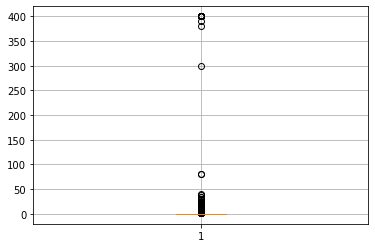

In [42]:
plt.boxplot(data['Price'])

plt.grid()
plt.show()


In [34]:
print('Yes we can expect apps on the play store to cost $200')
data.loc[data['Price'] > 200]

Yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [44]:
limit_data = data[data['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [46]:
limit_data.shape

(9338, 13)

b.Reviw column

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

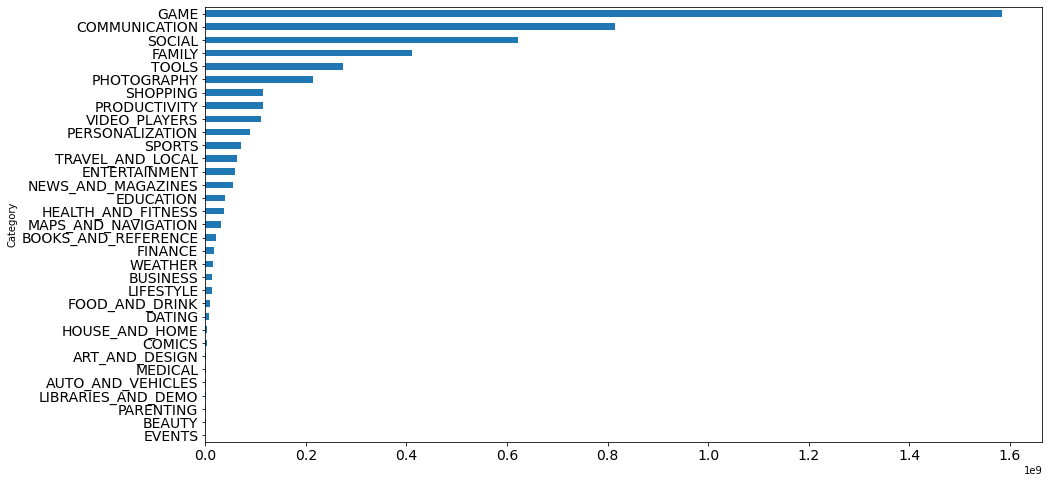

In [48]:
total=data.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

i. Make suitable plot

C:\Users\prasenjit patra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


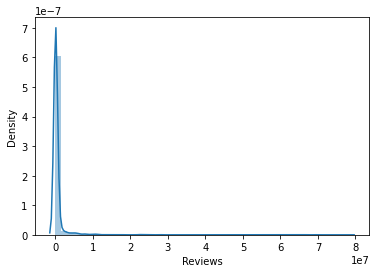

In [49]:
sns.distplot(data
             ['Reviews'])
plt.show()

i. Limit data to apps with < 1 Million reviews

In [50]:
limit_data_by_review = data[data['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


c. Installs

i. What is the 95th percentile of the installs

In [52]:
in_st = data.Installs.quantile(0.95) # 95th percentile
print(in_st)

100000000.0


In [53]:
for i in range(0,101,1):
    print(' the {} percentile of installs is {} '.format(i,np.percentile(data['Installs'],i)))

 the 0 percentile of installs is 5.0 
 the 1 percentile of installs is 50.0 
 the 2 percentile of installs is 100.0 
 the 3 percentile of installs is 100.0 
 the 4 percentile of installs is 100.0 
 the 5 percentile of installs is 500.0 
 the 6 percentile of installs is 500.0 
 the 7 percentile of installs is 1000.0 
 the 8 percentile of installs is 1000.0 
 the 9 percentile of installs is 1000.0 
 the 10 percentile of installs is 1000.0 
 the 11 percentile of installs is 1000.0 
 the 12 percentile of installs is 1000.0 
 the 13 percentile of installs is 1000.0 
 the 14 percentile of installs is 1000.0 
 the 15 percentile of installs is 5000.0 
 the 16 percentile of installs is 5000.0 
 the 17 percentile of installs is 5000.0 
 the 18 percentile of installs is 5000.0 
 the 19 percentile of installs is 5000.0 
 the 20 percentile of installs is 10000.0 
 the 21 percentile of installs is 10000.0 
 the 22 percentile of installs is 10000.0 
 the 23 percentile of installs is 10000.0 
 the 24 

In [55]:
# Verification
x = data.Installs.quantile() > in_st
print (x)

False


# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
values?

C:\Users\prasenjit patra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


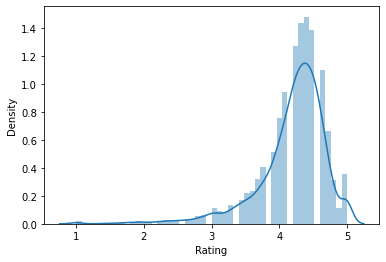

In [58]:
sns.distplot(data['Rating'])
plt.show()

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution

b. What is the implication of this on your analysis

In [59]:
data['Rating'].mode()

0    4.4
dtype: float64

6. What are the top Content Rating values?

In [60]:
data['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [61]:
Adult_rating = data[data['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =data[data['Content Rating'] == 'Unrated'].index.to_list()
data.drop(Adult_rating, inplace = True)
data.drop(unrated, inplace = True)
data['Content Rating'].value_counts()

Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [78]:
# Pie Diagram
import plotly.graph_objects as go

fig = go.Figure(go.Pie(
    name = "",
    values = [7414,1083,461,397,],
    labels = ['Everyone','Teen','Mature 17+','Everyone 10+',],
))
fig.show()

7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

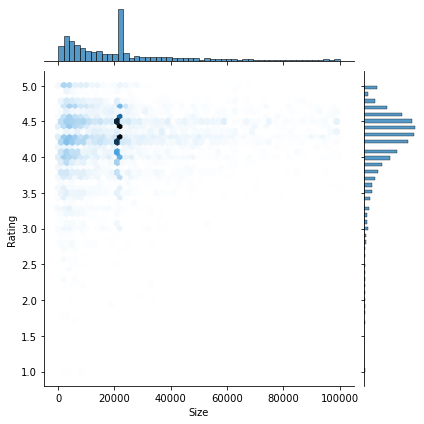

In [65]:
sns.jointplot(x=data['Size'],y=data['Rating'],data=data,kind='hex')
plt.show()

b. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating

c. How do you explain the pattern?

Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

8. Effect of price on rating

a. Make a jointplot (with regression line)

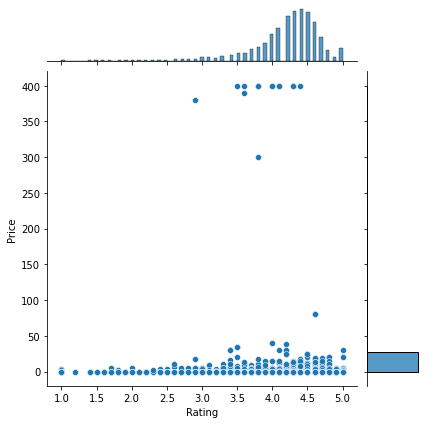

In [67]:
sns.jointplot(x ="Rating" , y = "Price" ,data = data)
plt.show()

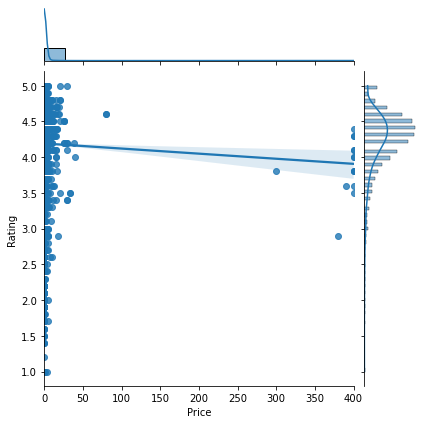

In [69]:
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')
plt.show()

b. What pattern do you see?

Generally on increasing the Price, Rating remains almost constant greater than 4.

c. How do you explain the pattern?

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

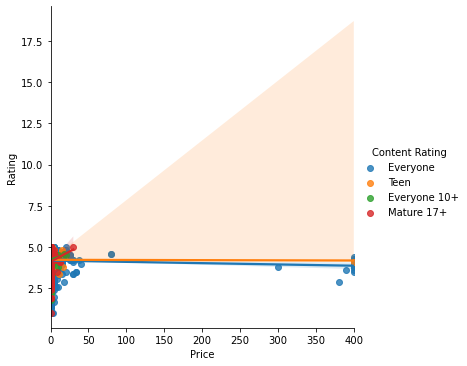

In [71]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=data)
plt.show()

In [74]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068399,0.078886,0.051636,-0.021899
Reviews,0.068399,1.000000,0.125459,0.641600,-0.009826
Size,0.078886,0.125459,1.000000,0.075375,-0.025648
Installs,0.051636,0.641600,0.075375,1.000000,-0.011898
Price,-0.021899,-0.009826,-0.025648,-0.011898,1.000000


d. Replot the data, this time with only records with price > 0

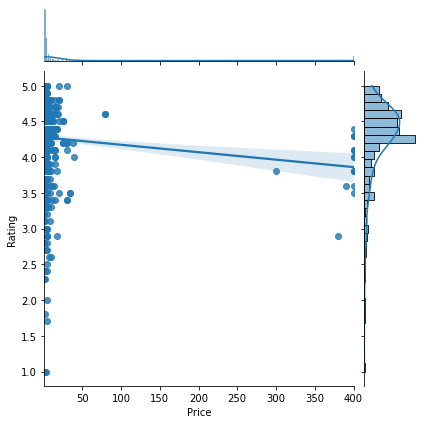

In [75]:
ps_x=data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=ps_x, kind='reg')
plt.show()

e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [76]:
ps_x.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.044118,0.116286,0.060133,-0.112165
Reviews,0.044118,1.000000,0.035571,0.867304,-0.015098
Size,0.116286,0.035571,1.000000,0.075057,-0.077510
Installs,0.060133,0.867304,0.075057,1.000000,-0.023623
Price,-0.112165,-0.015098,-0.077510,-0.023623,1.000000


f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together –

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price

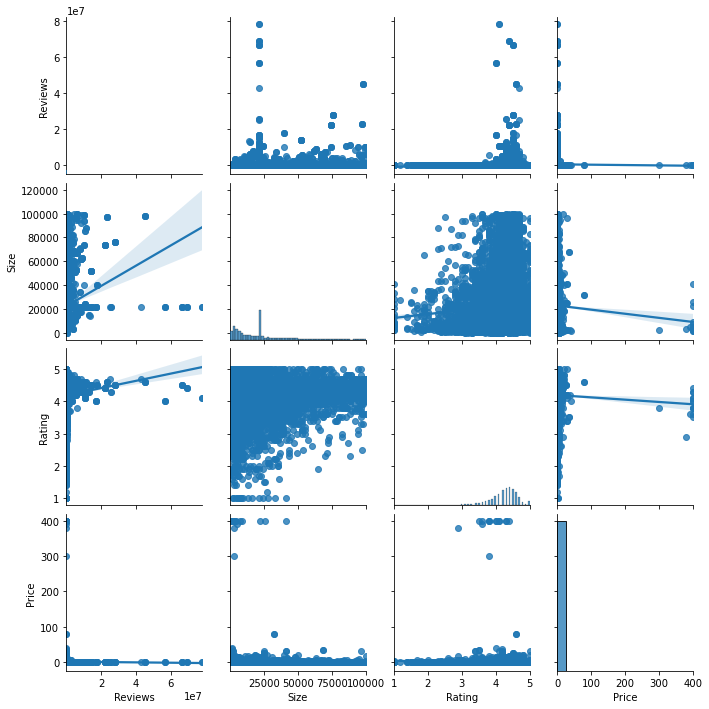

In [77]:
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# Task 10. Rating vs. content rating

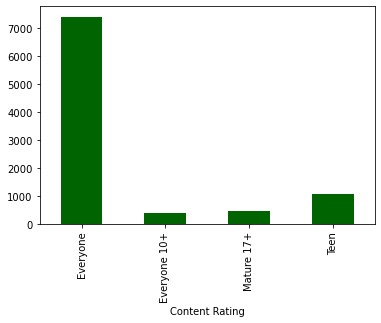

In [81]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

. Which metric would you use? Mean? Median? Some other quantile?¶

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

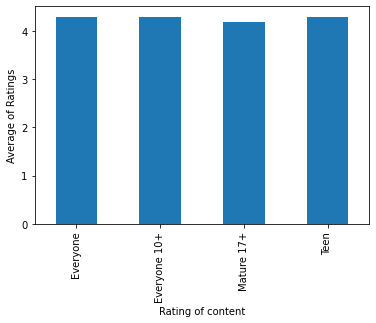

In [82]:
a = data['Rating'].groupby(data['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

11. Content rating vs. size vs. rating – 3 variables at a time

C:\Users\prasenjit patra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



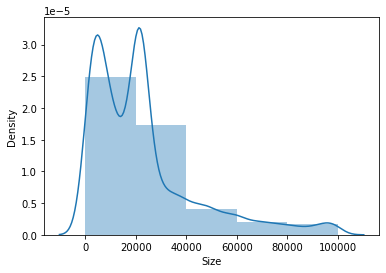

In [83]:
#Checking skewness
sns.distplot(data["Size"], bins=5)
plt.show()

In [86]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.148721,4.247561,4.015183,4.187047
20k-40k,4.228845,4.197802,4.195109,4.237590
40k-60k,4.192505,4.265957,4.202222,4.270896
60k-80k,4.271774,4.374000,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


In [90]:
temp3=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating',
                     aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40k-60k,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


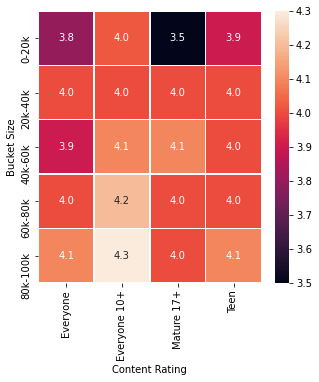

In [91]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

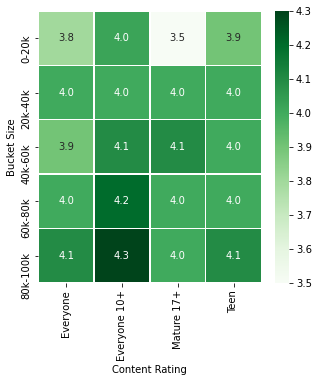

In [95]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

In [93]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
data['Size_Buckets'] = pd.cut(data['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(data, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.224490
LOW,4.161317,4.207143,4.129592,4.209655
MED,4.186006,4.300000,3.900000,4.131847
HIGH,4.244872,4.227273,4.208497,4.243333
VERY HIGH,4.208134,4.287805,4.197170,4.279603


In [87]:
Size_Buckets =pd.pivot_table(data, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,3.9,4.16,3.50,3.90
HIGH,4.0,4.00,4.00,4.00
VERY HIGH,3.9,4.10,4.00,4.00


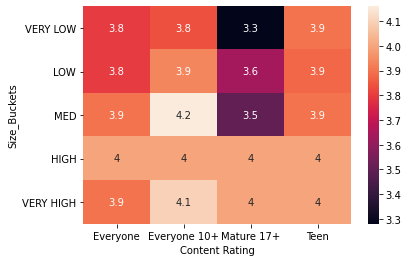

In [94]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

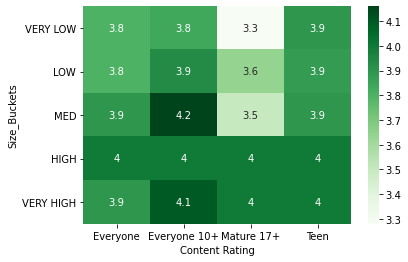

In [96]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()